In [48]:
import pandas as pd
import numpy as np 
dat = r"C:\Users\steph\Downloads\encoded_df.csv"
df = pd.read_csv(dat)

# Split data
## add binary encoding to min true if > than 120

In [49]:
from sklearn.model_selection import train_test_split
headers = list(df.columns)
exc= ['id', 'relDate', 'minute']
ind_var= [x for x in headers if x not in exc]
print(ind_var)
dep_var = ["minute"]
df['bin_min'] = [0]*17313
for (x,y) in enumerate(df['minute']):
    if y>120:
        df.loc[x,'bin_min']= 1
    else:
        df.loc[x,'bin_min']=0


['date', 'rating', 'relCountry_Argentina', 'relCountry_Australia', 'relCountry_Brazil', 'relCountry_Canada', 'relCountry_China', 'relCountry_Czechia', 'relCountry_Denmark', 'relCountry_France', 'relCountry_Germany', 'relCountry_Greece', 'relCountry_Hong Kong', 'relCountry_India', 'relCountry_Italy', 'relCountry_Japan', 'relCountry_Mexico', 'relCountry_Netherlands', 'relCountry_Philippines', 'relCountry_Poland', 'relCountry_Portugal', 'relCountry_Russian Federation', 'relCountry_South Korea', 'relCountry_Spain', 'relCountry_Sweden', 'relCountry_Switzerland', 'relCountry_Turkey', 'relCountry_UK', 'relCountry_USA', 'type_Digital', 'type_Premiere', 'type_TV', 'type_Theatrical', 'type_Theatrical limited', 'studio_20th Century Fox', 'studio_ARD', 'studio_ARTE', 'studio_ARTE France Cinéma', 'studio_American Mutoscope & Biograph', 'studio_BBC', 'studio_BFI', 'studio_BR', 'studio_CNC', 'studio_Canal+', 'studio_Channel 4 Television', 'studio_Columbia Pictures', 'studio_DEFA', 'studio_Daiei Film'

# Binary Testing Metrics

In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score
def precision(actual,predicted):
    return precision_score(df[actual],df[predicted])
def recall(actual,predicted):
    return recall_score(df[actual],df[predicted])
def f1(actual,predicted):
    return f1_score(df[actual],df[predicted])

# KNN MODEL

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

x = df[ind_var]
y = df['bin_min']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
df['Accuracy_bin'] = accuracy
k_values = [i for i in range (1,10)]
scores =[]
scaler = StandardScaler()
X = scaler.fit_transform(x)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

## Initial Model

Text(0, 0.5, 'Accuracy Score')

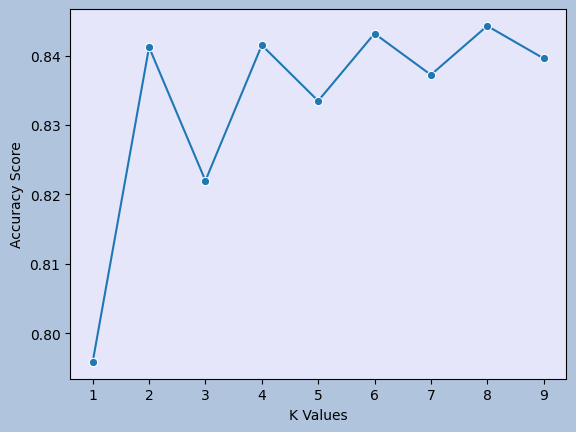

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")



In [53]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average = 'macro')
recall = recall_score(Y_test, y_pred, average = 'macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8613918567715854
Precision: 0.7111471017721018
Recall: 0.546849880214447


# Improved KNN Model

In [54]:
x = df[ind_var]
y = df['bin_min']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
df['Accuracy_bin'] = accuracy
k_values = [i for i in range (1,50)]
scores =[]
scaler = StandardScaler()
X = scaler.fit_transform(x)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

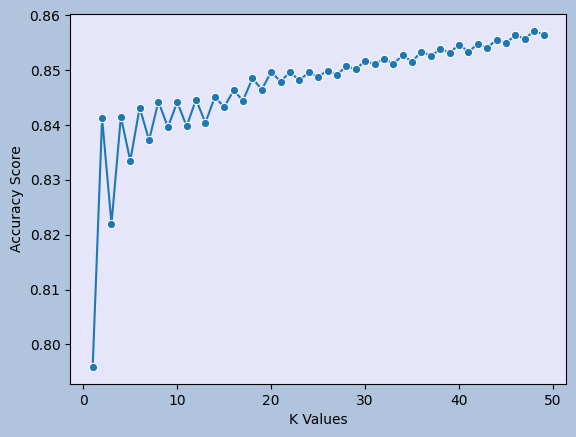

In [55]:
plt.figure(facecolor='lightsteelblue')
ax = plt.axes()
ax.set_facecolor('lavender')
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [56]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average = 'macro')
recall = recall_score(Y_test, y_pred, average = 'macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8674559630378285
Precision: 0.7149352772703697
Recall: 0.5273469051051956
